# Worksheet 18

Name: Rishi Shah
UID: U21345032

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

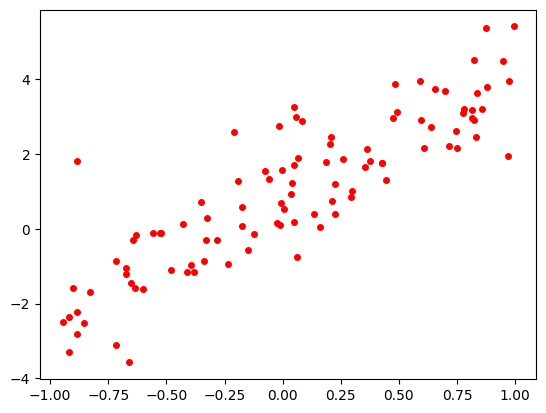

In [1]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

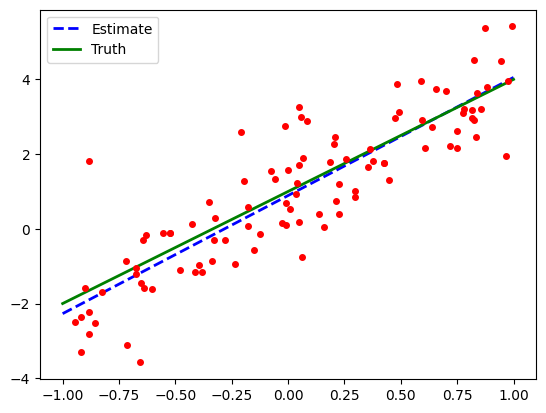

In [2]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimated parameters for the linear regression are approximately [0.94, 3.10]. Comparing these with the true parameters used to generate the data, which were [1,3], we can see that the estimation is quite close. This is probably due to noise.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

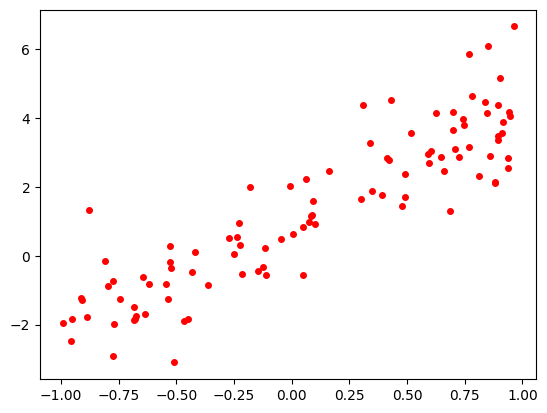

In [5]:
SAMPLE_SIZE = 100
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)  # X values
eps = np.random.randn(SAMPLE_SIZE)  # Random noise

# Generating Y values
y = 1 + 3 * x + 0.5 * x**2 + eps

# Plotting the dataset
plt.plot(x, y, 'ro', markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

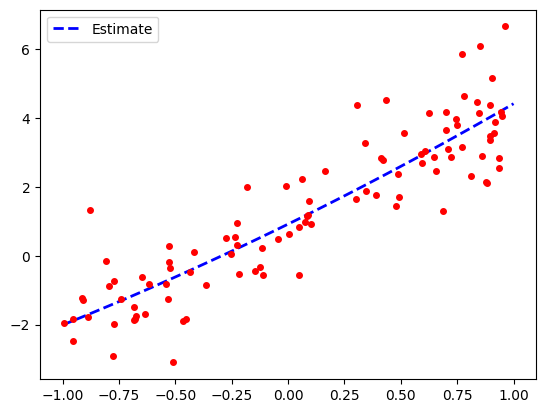

In [7]:
# Preparing the matrix for linear regression (quadratic model)
intercept = np.ones(SAMPLE_SIZE)
X = np.array([intercept, x, x**2]).T

# Computing the least squares estimate using matrix operations
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Generating the estimated line
x_plot = np.linspace(-1, 1, 100)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * x_plot**2

# Plotting
plt.plot(x_plot, y_est, 'b--', lw=2, label='Estimate')
plt.plot(x, y, 'ro', markersize=4)
plt.legend()
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The esimated params are [1.01, 3.00, 0.38] are pretty close to the parameters used to make the data, [1, 3, 0.5]. This suggests that the model is good, with the variation likely due to the noise we added.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

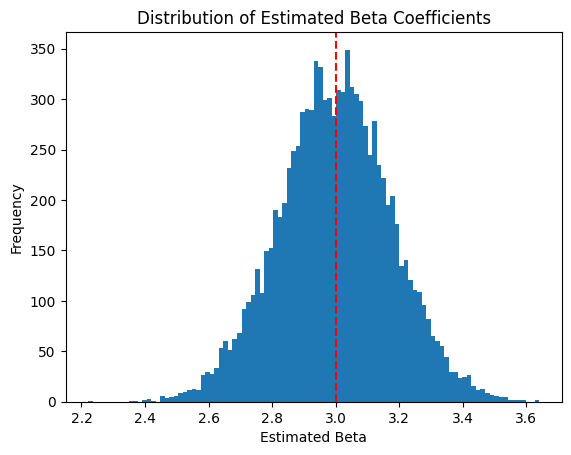

In [8]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100
true_beta = np.array([1, 3, 0.5])
betas = []

for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    eps = np.random.randn(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + eps

    intercept = np.ones(SAMPLE_SIZE)
    X = np.array([intercept, x, x**2]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    betas.append(beta_hat)

# Plotting the histogram of the estimates for the linear coefficient
plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.xlabel('Estimated Beta')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Beta Coefficients')
plt.show()